In [1]:
# Student Placement Prediction using Machine Learning
# EDA and Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
sns.set_palette("deep")


In [2]:
df = pd.read_csv("../data/placement.csv")
df.head()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [3]:
df.shape


(10000, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [5]:
df.describe()


,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


In [6]:
df.columns


Index(['StudentID', 'CGPA', 'Internships', 'Projects',
       'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating',
       'ExtracurricularActivities', 'PlacementTraining', 'SSC_Marks',
       'HSC_Marks', 'PlacementStatus'],
      dtype='object')

In [7]:
df['PlacementStatus'].value_counts()


NotPlaced    5803
Placed       4197
Name: PlacementStatus, dtype: int64

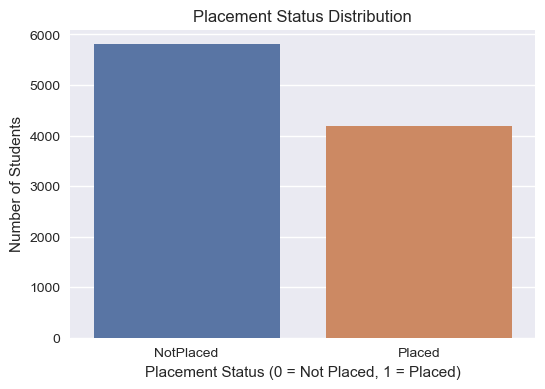

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='PlacementStatus', data=df)
plt.title("Placement Status Distribution")
plt.xlabel("Placement Status (0 = Not Placed, 1 = Placed)")
plt.ylabel("Number of Students")
plt.show()


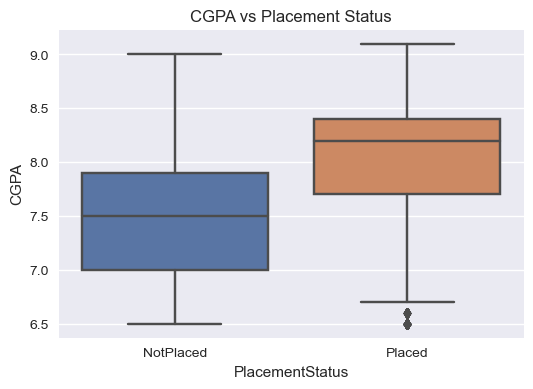

In [9]:
plt.figure(figsize=(6,4))
sns.boxplot(x='PlacementStatus', y='CGPA', data=df)
plt.title("CGPA vs Placement Status")
plt.show()


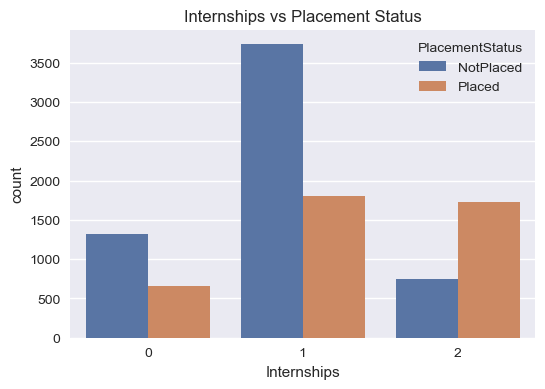

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Internships', hue='PlacementStatus', data=df)
plt.title("Internships vs Placement Status")
plt.show()


In [11]:
df['PlacementStatus'].unique()


array(['NotPlaced', 'Placed'], dtype=object)

In [12]:
df['PlacementStatus'] = df['PlacementStatus'].map({
    'Placed': 1,
    'NotPlaced': 0
})


In [13]:
df['PlacementStatus'].isna().sum()


0

In [14]:
df['PlacementStatus'].value_counts()


0    5803
1    4197
Name: PlacementStatus, dtype: int64

In [15]:
df = df.drop(columns=['StudentID'], errors='ignore')


In [16]:
X = df.drop('PlacementStatus', axis=1)
y = df['PlacementStatus']


In [19]:
# Find columns that still contain 'Yes' or 'No'
for col in X.columns:
    if X[col].astype(str).str.contains('Yes|No').any():
        print(col)


ExtracurricularActivities
PlacementTraining


In [20]:
# Convert any remaining Yes/No strings in feature columns
for col in X.columns:
    X[col] = X[col].replace({'Yes': 1, 'No': 0})


In [21]:
(X.applymap(type) == str).any()


CGPA                         False
Internships                  False
Projects                     False
Workshops/Certifications     False
AptitudeTestScore            False
SoftSkillsRating             False
ExtracurricularActivities    False
PlacementTraining            False
SSC_Marks                    False
HSC_Marks                    False
dtype: bool

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [23]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("model trained sucessfully\nAccuracy:", accuracy_score(y_test, y_pred))


model trained sucessfully
Accuracy: 0.7945


In [27]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[954 218]
 [193 635]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      1172
           1       0.74      0.77      0.76       828

    accuracy                           0.79      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.80      0.79      0.79      2000

